In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
%cd /content/drive/My Drive/CSU_Teaching/Spring2023/All_Courses/Computer_Vision_1/Codes/Image_Processing/

/content/drive/My Drive/CSU_Teaching/Spring2023/All_Courses/Computer_Vision_1/Codes/Image_Processing


In [42]:
%ls

circles.jpg                          movie-wall-e-ad.jpg
Image_Processing_Basics_final.ipynb  Unequalized_Hawkes_Bay_NZ.jpg
lenna.png


In [43]:
path_to_codes = '/content/drive/My Drive/CSU_Teaching/Spring2023/All_Courses/Computer_Vision_1/Codes/Image_Processing/'

<class 'numpy.ndarray'>
(1080, 1920, 3)
[[[ 97  97 131]
  [ 11  13  70]
  [ 14  13  71]
  ...
  [  9   1  48]
  [  9   1  48]
  [  8   0  47]]

 [[ 97  97 133]
  [ 11  13  70]
  [ 13  14  71]
  ...
  [ 10   2  49]
  [  9   1  48]
  [  8   1  45]]

 [[ 94  97 132]
  [  8  13  71]
  [ 12  13  70]
  ...
  [  9   2  46]
  [  9   2  46]
  [  8   1  45]]

 ...

 [[209 178 184]
  [182 130 142]
  [176 133 142]
  ...
  [  8  23  54]
  [  5  14  31]
  [  4   0   3]]

 [[208 177 182]
  [182 130 142]
  [177 134 143]
  ...
  [  7  21  47]
  [  0   5  18]
  [  3   0   7]]

 [[207 175 180]
  [181 129 141]
  [178 135 142]
  ...
  [  4  15  37]
  [  0   4  15]
  [  1   0   8]]]
[[ 97  11  14 ...   9   9   8]
 [ 97  11  13 ...  10   9   8]
 [ 94   8  12 ...   9   9   8]
 ...
 [209 182 176 ...   8   5   4]
 [208 182 177 ...   7   0   3]
 [207 181 178 ...   4   0   1]]
[[ 97  13  13 ...   1   1   0]
 [ 97  13  14 ...   2   1   1]
 [ 97  13  13 ...   2   2   1]
 ...
 [178 130 133 ...  23  14   0]
 [177 130

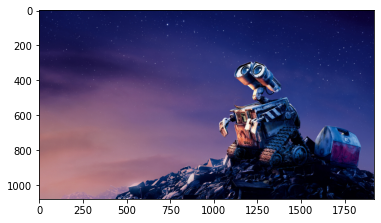

<class 'numpy.ndarray'>
(512, 512, 3)


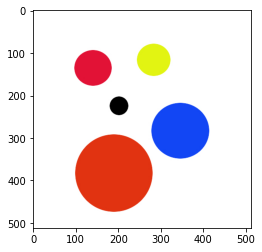

In [44]:
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread(path_to_codes+'movie-wall-e-ad.jpg')

print(type(img))
print(img.shape)
print(img)

print(img[:,:,0])
print(img[:,:,1])
print(img[:,:,2])
  
# Output Images
plt.imshow(img)
plt.show()

# Read Images
img1 = mpimg.imread(path_to_codes+'circles.jpg')

print(type(img1))
print(img1.shape)
  
# Output Images
plt.imshow(img1)
plt.show()

**Image Processing in OpenCV**


https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [45]:
import numpy as np
import pandas as pd
import cv2 as cv 

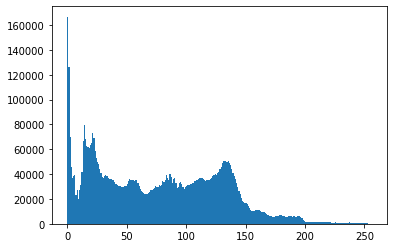

In [46]:
plt.hist(img.ravel(),bins = 256, range = [0,256]) 
plt.show()

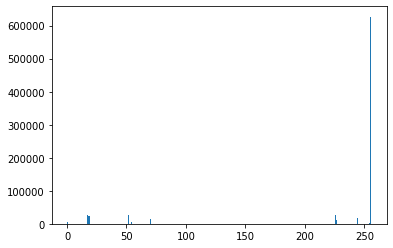

In [47]:
plt.hist(img1.ravel(),bins = 256, range = [0,256]) 
plt.show()

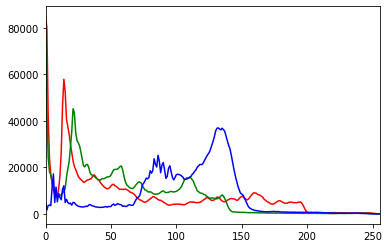

In [48]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

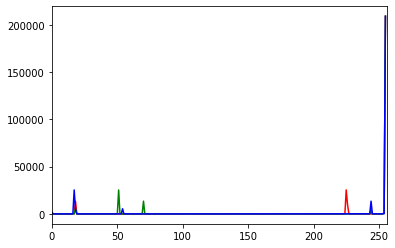

In [49]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

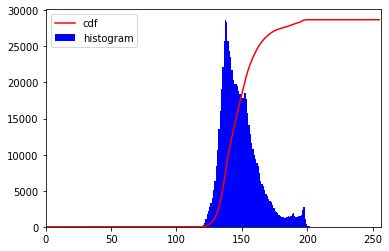

In [50]:
img_h = cv.imread(path_to_codes+'Unequalized_Hawkes_Bay_NZ.jpg',0)
hist,bins = np.histogram(img_h.flatten(),256,[0,256])

# cumulative distribution function
cdf = hist.cumsum()
# normalized cumulative distribution function
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'r')
plt.hist(img_h.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

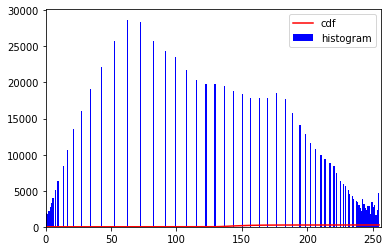

In [51]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf_mm = np.ma.filled(cdf_m,0).astype('uint8')
img2_h = cdf_mm[img_h]
plt.plot(cdf_mm, color = 'r')
plt.hist(img2_h.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper right')
plt.show()

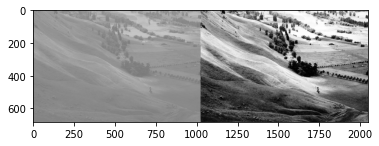

In [52]:
res = np.hstack((img_h,img2_h))
plt.imshow(res, cmap='gray')
plt.show()

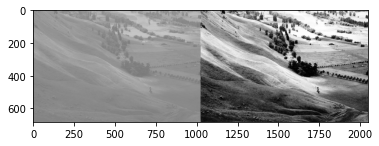

In [53]:
img_h = cv.imread(path_to_codes+'Unequalized_Hawkes_Bay_NZ.jpg',0)
equ = cv.equalizeHist(img_h)
res = np.hstack((img_h,equ))
plt.imshow(res, cmap='gray')
plt.show()

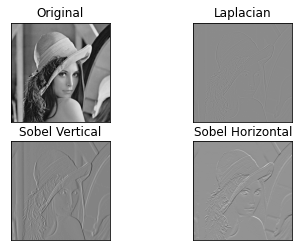

In [54]:
# Read images using OpenCV
img2 = cv.imread(path_to_codes+"lenna.png", 0)

# Laplacian Filter
laplacian = cv.Laplacian(img2, cv.CV_64F)

# Vertical Edges
sobelx = cv.Sobel(img2, cv.CV_64F, 1, 0, ksize=3)

# Horizontal Edges
sobely = cv.Sobel(img2, cv.CV_64F, 0, 1, ksize=3)

# Display Results
plt.subplot(2, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel Vertical')
plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Horizontal')
plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


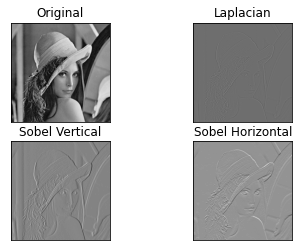

In [57]:
from skimage.io import imread
from skimage.filters import laplace
from skimage.filters import sobel_h, sobel_v


# Read images using scikit-image
img3 = imread(path_to_codes+"lenna.png", as_gray=True)

# Laplacian Filter
laplacian = laplace(img3)

# Vertical Edges
sobelx = sobel_v(img3)

# Horizontal Edges
sobely = sobel_h(img3)

# Display Results
plt.subplot(2, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel Vertical')
plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Horizontal')
plt.xticks([]), plt.yticks([])

plt.show()